<a href="https://colab.research.google.com/github/DrHB/PyTorch-Course/blob/main/Intro-PyTorch-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to PyTorch Part 1

> by Habib Bukhari and Roman Vaxenburg

In this section:
* Tensor initialization
* Main attributes of tensors: dtype, device, requires_grad
* Tensor operations
* Derivatives and gradients
* Simple linear regression

In [1]:
import torch
import matplotlib.pyplot as plt
import torchvision.datasets as datasets
import numpy as np
from torchvision import transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from matplotlib import animation, rc
import pandas as pd
import seaborn as sbn
!pip install fastdot -q
from fastdot import *
rc('animation', html='jshtml')
%matplotlib inline

     |████████████████████████████████| 61kB 5.3MB/s 


`PyTorch` is a popular open source library for deep learning with python. It is easy to learn, it allows fast research prototyping, and it's fun!

Among other things, `PyTorch` contains:
* A GPU-ready tensor library
* A neural network library
* An automatic differentiation library
* DataLoader and utility libraries

https://pytorch.org

https://github.com/pytorch/pytorch

# Tensors

<div class="alert alert-block alert-info">
<b>Tensor </b> is the main datatype in pytorch. Essentially, tensors are N-dimentional arrays holding data. Tensors can also represent trainable parameters. In this case, tensors will also track all mathematical transformation applied to them for later gradient calculation (more on this later).
</div>

https://pytorch.org/docs/stable/tensors.html


## Tensor initialization

For more information please see:
* Tensor creation ops: https://pytorch.org/docs/stable/torch.html#tensor-creation-ops
* Tensor attributes: https://pytorch.org/docs/stable/tensor_attributes.html#tensor-attributes-doc

Let's initialize a tensor and take a look at its main attributes

In [2]:
x = torch.tensor([0, 1, 1, 2, 3, 5, 8]) # if not specified, dtype is inferred automatically
x

tensor([0, 1, 1, 2, 3, 5, 8])

In [3]:
x.shape

torch.Size([7])

In [4]:
x.dtype

torch.int64

Some other `dtype`s of tensors:
* 32-bit floating point: `torch.float32`
* 64-bit floating point: `torch.float64`
* 8-bit unsigned integer: `torch.uint8`
* boolean (`True` or `False`): `bool`

https://pytorch.org/docs/stable/tensors.html

In [5]:
x.device

device(type='cpu')

In [6]:
x.requires_grad

False

In [7]:
x = torch.tensor([0, 1, 1, 2, 3, 5, 8], dtype=torch.float32, device='cpu', requires_grad=False)
x

tensor([0., 1., 1., 2., 3., 5., 8.])

In [8]:
x.dtype

torch.float32

Other useful ways to create tensors

In [9]:
x = torch.zeros(2, 3) # 2 rows by 3 columns
x

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [10]:
x = torch.ones(3, 2)
x

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])

In [11]:
x = torch.rand(2, 4, 3) # 3d tensor, random numbers between 0 and 1
x

tensor([[[0.7418, 0.0980, 0.5411],
         [0.5593, 0.4172, 0.8941],
         [0.7981, 0.6470, 0.0363],
         [0.2183, 0.7354, 0.9670]],

        [[0.7083, 0.1997, 0.3957],
         [0.4107, 0.8719, 0.5060],
         [0.4666, 0.4166, 0.6985],
         [0.3652, 0.4998, 0.7049]]])

In [12]:
x.shape # getting shape or size of the tensor

torch.Size([2, 4, 3])

## Indexing

In [13]:
x = torch.tensor([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
x

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

In [14]:
x[0, 0] # single matrix element, [0, 0]

tensor(0)

In [15]:
x[0, 1] # etc.

tensor(1)

In [16]:
x[0] # 0-th row

tensor([0, 1, 2])

In [17]:
x[:, 0] # 0-th column

tensor([0, 3, 6])

In [18]:
x[1, 1:3] # row 1, columns from 1 to 3 (pythonic)

tensor([4, 5])

## Tensor operations

All the usual mathematical operations apply to tensors. Also, tensors can be reshaped, concatenated, stacked, permuted, etc.

Element-wise math operations: https://pytorch.org/docs/stable/torch.html?highlight=indexing#math-operations

In [19]:
a = torch.tensor([1.])
b = torch.tensor([2.])

In [20]:
print(a, a.dtype)
print(b, b.dtype)

tensor([1.]) torch.float32
tensor([2.]) torch.float32


#### Addition

In [21]:
a + b

tensor([3.])

#### Multiplication

In [22]:
a * b

tensor([2.])

#### Division

In [23]:
a / b

tensor([0.5000])

#### Square root, power, trigonometry, sum, absolute value, min, max, and anything else you can imagine

In [24]:
torch.sqrt(b)

tensor([1.4142])

In [25]:
torch.pow(b, 3) # overloading: b**3

tensor([8.])

In [26]:
torch.cos(b)

tensor([-0.4161])

In [27]:
x = torch.randn(3, 4)
x

tensor([[-0.3251,  0.2067, -0.4336, -0.2519],
        [-0.1062, -0.1352,  0.0968, -2.3152],
        [-0.9281, -0.0627,  0.8735,  1.6666]])

In [28]:
torch.sum(x)

tensor(-1.7142)

In [29]:
torch.mean(x)

tensor(-0.1429)

In [30]:
torch.mean(x, dim=0) # Average over rows for each column separately

tensor([-0.4531,  0.0029,  0.1789, -0.3002])

In [31]:
torch.abs(x)

tensor([[0.3251, 0.2067, 0.4336, 0.2519],
        [0.1062, 0.1352, 0.0968, 2.3152],
        [0.9281, 0.0627, 0.8735, 1.6666]])

In [32]:
torch.max(x)

tensor(1.6666)

#### Comparison operations

In [33]:
a = torch.tensor([[0, 1, 2], 
                  [3, 4, 5]])

b = torch.tensor([[0, 1, 2], 
                  [6, 7, 8]])
print(a)
print(b)

tensor([[0, 1, 2],
        [3, 4, 5]])
tensor([[0, 1, 2],
        [6, 7, 8]])


In [34]:
a == b # Element-wise comparison

tensor([[ True,  True,  True],
        [False, False, False]])

In [35]:
a < b # Element-wise comparison

tensor([[False, False, False],
        [ True,  True,  True]])

In [36]:
torch.equal(a, b) # True if two tensors have the same size and elements

False

In [37]:
torch.equal(a, a) # Trivial

True

#### Reshaping tensors

In [38]:
x = torch.rand(3, 2)
x

tensor([[0.7734, 0.4109],
        [0.4597, 0.1749],
        [0.2968, 0.9251]])

In [39]:
x.shape

torch.Size([3, 2])

In [40]:
x.reshape(6)

tensor([0.7734, 0.4109, 0.4597, 0.1749, 0.2968, 0.9251])

In [41]:
x.reshape(2, 3)

tensor([[0.7734, 0.4109, 0.4597],
        [0.1749, 0.2968, 0.9251]])

In [42]:
x = torch.arange(9)
x

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [43]:
x = x.reshape(3, 3)
x

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

In [44]:
x.shape

torch.Size([3, 3])

In [45]:
x.T

tensor([[0, 3, 6],
        [1, 4, 7],
        [2, 5, 8]])

#### Concatenate tensors

In [46]:
a = torch.arange(9).view(3, 3)
b = torch.arange(9).view(3, 3) + 10

In [47]:
a

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

In [48]:
b

tensor([[10, 11, 12],
        [13, 14, 15],
        [16, 17, 18]])

In [49]:
x = torch.cat((a, b))
x

tensor([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [10, 11, 12],
        [13, 14, 15],
        [16, 17, 18]])

In [50]:
x.shape

torch.Size([6, 3])

In [51]:
x = torch.cat((a, b), dim=1) # concatenate along dimension 1 (dim=0 by default)
x

tensor([[ 0,  1,  2, 10, 11, 12],
        [ 3,  4,  5, 13, 14, 15],
        [ 6,  7,  8, 16, 17, 18]])

In [52]:
x.shape

torch.Size([3, 6])

#### Some operations are not element-wise. Instead, they follow other rules, e.g. Linear Algebra rules of matrix multiplication

Matrix multiplication example

In [53]:
a = torch.rand(3, 4) # 3x4 matrix
b = torch.rand(4, 2) # 4x2 matrix

print(a)
print(b)

tensor([[0.2991, 0.6442, 0.2514, 0.6843],
        [0.3181, 0.7885, 0.8429, 0.4867],
        [0.2448, 0.6431, 0.8633, 0.3037]])
tensor([[0.1698, 0.4580],
        [0.1639, 0.7985],
        [0.2485, 0.1992],
        [0.0349, 0.5334]])


In [54]:
torch.mm(a, b) # The result is 3x2

tensor([[0.2427, 1.0665],
        [0.4097, 1.2029],
        [0.3721, 0.9597]])

Shorthand notation for matrix multiplication, instead of `torch.mm`

In [55]:
a @ b

tensor([[0.2427, 1.0665],
        [0.4097, 1.2029],
        [0.3721, 0.9597]])

## Derivatives and gradients

Our deep learning model will contain trainable parameters, usually referred to as weights and biases. Our goal will be to use a training algorithm to find the optimal values of these parameters so the model can perform a given task in the best possible way. To do this, we will need to calculate derivatives (technically - the gradient) with respect to the model parameters.

<div class="alert alert-block alert-info">
<b>Derivative </b> -The definition of the derivative can be approached in two different ways. One is geometrical (as a slope of a curve) and the other one is physical (as a rate of change). <br>
</div>
Let's use a simple polynomial as an example: $f(x) = x^2 - 2x +3$, whose derivative is $f'(x) = 2x - 2$

In [56]:
def f(x):
    return x**2 - 2*x + 3

# f = lambda x: x**2 - 2*x + 3 # another way to write this

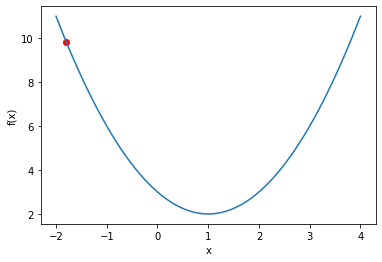

In [57]:
#hide
x = torch.linspace(-2, 4, 100) # tensor of 100 values from -2 to 4 with fixed step
plt.plot(x, f(x))
plt.scatter(-1.8, f(-1.8), color='red')
plt.xlabel('x')
plt.ylabel('f(x)');

<div class="alert alert-block alert-info">
Once tensor's attribute <b>requires_grad</b> is set to <b>True</b>, the sequence of all the subsequent operations will be recorded. Then, the derivative of the result of these calculations, with respect to the initial tensor, can be calculated. <br>
</div>

Let's try this!

In [58]:
x = torch.tensor([4.], requires_grad=True) # Note: requires_grad=True
x

tensor([4.], requires_grad=True)

In [59]:
y = f(x)

In [60]:
y # Note: grad_fn

tensor([11.], grad_fn=<AddBackward0>)

Calculate the derivative of `y` with respect to `x`

In [61]:
y.backward()

This is the value of the derivative of `y` with respect to `x`

The calculated derivative is stored as an `attribute` of our tensor `x`

In [62]:
x.grad

tensor([6.])

The derivative of $x^2 - 2x + 3$ is $2x - 2$. 

In our case $x=4$ so the gradinet (derivative) is indeed $4\times 2 - 2 = 6$.

There is no need to memorize this, just understand the logic of what is going on under the hood. `PyTorch` will handle the rest for us!

### A note on backpropagation

Deep learning models may contain thousands or millions of trainable parameters. During model training, `PyTorch` will keep track of and calculate all the derivatives for us using the **backpropagation** algorithm. 

In essence, a deep learning model is just a sequence of mathematical transformations of the model inputs. After pushing the input data through the network, and keeping track of all the transformations along the way, `PyTorch` will "reverse" that sequence and calculate the derivatives with respect to all the parameters using chain rule. The chain rule is a way to calculate derivatives of composite functions, of which the neural network is one!

https://en.wikipedia.org/wiki/Backpropagation

https://pytorch.org/docs/stable/autograd.html

## Simple linear regression

<div class="alert alert-block alert-info">
In a regression task, we predict one or more continuous real values based on the input, which can be both continuous or discrete (categorical). The variable we are predicting is called the criterion variable and is referred to as <b>y</b>. The variable we are basing our predictions on is called the predictor variable (or feature) and is referred to as <b>x</b>. When there is only one predictor variable, the prediction method is called simple regression. In simple linear regression, the topic of this section, the predictions of <b>y</b> when plotted as a function of <b>x</b> forms a straight line. <br>
</div>

Now we are going to see how to fit the parameters of a very simple model to describe the given data best.

Suppose we have a dataset consisting of pairs of values $(x_i, y_i)$ with $i=0,1,2,...$. Let's pick a simple linear relation $y=mx+c$ and try to find the optimal values of the parameters $m$ and $c$ so that this linear relation matches the dataset to the best of its capability.

Linear regression is an approach to find a linear relationship between two variables and it's defind by the formula $y=mx+c$

First, let's use the same linear relation, add noise to it, and create the dataset!

$y_i = mx_i + c + \epsilon_i$

read more [here!](http://onlinestatbook.com/2/regression/intro.html)

In [63]:
n = 100
x = torch.rand(n, 1) # generate 100 random values of x
print(x[:10])
print(x.shape)

tensor([[0.9930],
        [0.7573],
        [0.2236],
        [0.9666],
        [0.8707],
        [0.3775],
        [0.9701],
        [0.2816],
        [0.8616],
        [0.2998]])
torch.Size([100, 1])


In [64]:
m_true = torch.tensor([3.,]) # pick m (arbitrary)
m_true

tensor([3.])

In [65]:
m_true.shape

torch.Size([1])

In [66]:
c_true = torch.tensor([1.]) # pick c (also arbitrary)
c_true

tensor([1.])

In [67]:
eps = torch.randn(n) / 3 # generate noise
eps

tensor([-2.0796e-01, -1.3504e-02,  3.9381e-01, -5.2982e-01, -1.2515e-01,
        -3.5117e-01, -2.9159e-01,  1.8483e-03, -3.0617e-01,  4.2873e-02,
         2.1049e-01,  1.8403e-01,  1.5932e-01,  1.6334e-01, -1.2955e-01,
        -2.5972e-01, -3.6025e-01, -7.4855e-01,  3.1017e-01,  4.0976e-01,
        -1.0940e-01,  1.8848e-01, -5.6730e-01,  1.4800e-01, -4.3420e-01,
        -3.4966e-01,  3.5006e-02,  4.5271e-01,  3.8807e-01, -7.7555e-03,
         3.1647e-01,  3.4852e-01, -3.4991e-01, -4.4765e-01,  5.1340e-01,
        -3.7901e-01,  1.3224e-01, -1.0798e-01,  5.4753e-01,  1.1887e-01,
        -2.4729e-01, -4.3928e-01, -5.0036e-02,  1.8343e-01,  2.9689e-01,
         6.9782e-01, -5.2783e-02,  2.1065e-03, -2.0512e-01, -3.4200e-02,
         4.5078e-01,  1.1007e-01,  4.0001e-01,  7.6062e-02,  3.9149e-01,
         4.3947e-01, -7.5192e-02, -1.4385e-01, -4.5644e-01, -1.2845e-01,
         1.2402e+00, -2.7330e-01,  3.0082e-01,  3.0722e-01,  4.4445e-01,
         6.0458e-01, -1.6311e-01,  3.5413e-01,  1.5

In [68]:
print(x.shape)
print(m_true.shape)
print(c_true.shape)
print(eps.shape)

torch.Size([100, 1])
torch.Size([1])
torch.Size([1])
torch.Size([100])


In [69]:
y = x @ m_true + c_true + eps # generate the values of y corresponding to x

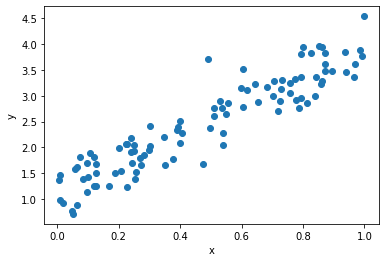

In [70]:
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y');

The dataset is ready!

Now let's fit our simple linear model to this data.

## Fitting the model

Let's fit our simple model to the data we've just created.

We use Mean Squared Error (MSE) $L = \frac{1}{N}\sum_{i=1}^N (y_i - \hat{y}_i)^2$ to measure the error of the model's line and data points. We want to find the values of $m$ and $c$ that minimize the value of MSE.

In [71]:
def mse(y_hat, y): 
    return ((y_hat - y)**2).mean()

Let's initialize `m` and `c` with some arbitrary values

In [72]:
m = torch.tensor([-2.3])
c = torch.tensor([4.5])

In [73]:
print(m)
print(c)

tensor([-2.3000])
tensor([4.5000])


In [74]:
y_pred_init = x @ m + c

In [75]:
mse(y_pred_init, y)

tensor(3.3382)

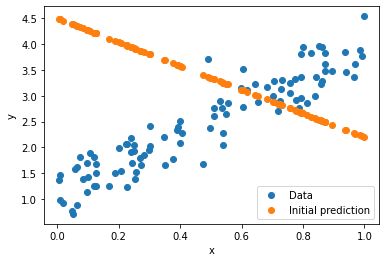

In [76]:
plt.scatter(x, y, label='Data')
plt.scatter(x, y_pred_init, label='Initial prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.legend();

Let's introduce `nn.Parameter`, or, equivalently, set `requires_grad=True`

<div class="alert alert-block alert-info">
<b>Parameter </b> -A model parameter is a configuration variable that is internal to the model and whose value can be estimated from data. <br>

They are required by the model when making predictions.<br>
They are learned from data.<br>
They are often not set manually by the practitioner.<br>
They are often saved as part of the learned model.<br>
</div>

In [77]:
m =  nn.Parameter(torch.tensor([-2.3]))
c =  nn.Parameter(torch.tensor([4.5]))

In [78]:
m, c

(Parameter containing:
 tensor([-2.3000], requires_grad=True), Parameter containing:
 tensor([4.5000], requires_grad=True))

### Simple training loop

Main components of the training loop: 

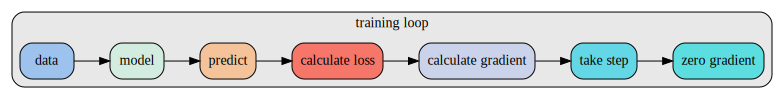

In [79]:
layers = ['data', 'model', 'predict', 'calculate loss', 'calculate gradient', 'take step', 'zero gradient']
block  = 'training loop'
g = graph_items(seq_cluster(layers, block))
g

<div class="alert alert-block alert-info">
<b>Forward pass</b> - pass your data through model <br>
<b>Calculate Loss</b> - calculate the eror between model prediction and ground truth <br>
<b>Backwards</b> - calculate the gradients <br>
<b>Step</b> - update the parameter based on the gradient (multiply gradient with learning rate) <br>
<b>Learning rate</b> -  hyperparameter that controls how much or how fast to change parameters  <br>   
<b>Hyperparameter</b> - is a configuration that is external to the model and whose value cannot be estimated from data <br>
</div>

The training loop will pass the data to the model and perform parameter updates over and over. 

One parameter update step looks like this:

$m_{i+1} = m_i - \alpha \frac{\partial L}{\partial m}$

* $m_{i+1}$ : updated parameter value at iteration $i+1$
* $m_i$ : parameter value at iteration $i$
* $\alpha$ : learning rate
* $\frac{\partial L}{\partial m}$ : derivative of the loss function $L$ with respect to the parameter $m$

In [80]:
def fit(lr):
    """This function performs one training step:
    
    1. Forward pass: pass data to model and calculate loss
    2. Backward pass: calculate derivatives
    3. Update parameters
    """
    y_hat = x @ m + c
    loss = mse(y, y_hat)
    if i % 100 == 0:
        print(f'i: {i}, MSE: {loss.item():.4f}')
    loss.backward()
    with torch.no_grad():
        m.data -= lr * m.grad
        c.data -= lr * c.grad
        m.grad.zero_()
        c.grad.zero_()

In [81]:
lr = 1e-1

In [82]:
for i in range(1000):
    fit(lr)

i: 0, MSE: 3.3382
i: 100, MSE: 0.2487
i: 200, MSE: 0.1191
i: 300, MSE: 0.1125
i: 400, MSE: 0.1122
i: 500, MSE: 0.1122
i: 600, MSE: 0.1122
i: 700, MSE: 0.1122
i: 800, MSE: 0.1122
i: 900, MSE: 0.1122


The model is trained by now. Let's compare the fitted parameters and the true ones

In [83]:
print(m_true)
print(m)

tensor([3.])
Parameter containing:
tensor([2.7619], requires_grad=True)


In [84]:
print(c_true)
print(c)

tensor([1.])
Parameter containing:
tensor([1.1446], requires_grad=True)


Let's calculate the model prediction and plot it

In [85]:
y_pred = x@m + c

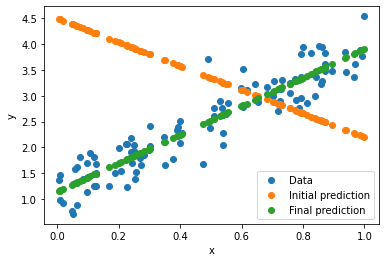

In [86]:
plt.scatter(x, y, label='Data')
plt.scatter(x, y_pred_init, label='Initial prediction')
plt.scatter(x, y_pred.detach(), label='Final prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.legend();

Let's visualize the training process

In [87]:
m =  nn.Parameter(torch.Tensor([-2.3]))
c =  nn.Parameter(torch.Tensor([4.5]))

In [88]:
def animate(i):
    fit(lr)
    line.set_ydata((x@m + c).detach())
    return line

fig = plt.figure()
plt.scatter(x, y, c='C0', label='Data')
y_pred = x@m + c
line, = plt.plot(x, y_pred.detach(), 'C2', label='Model prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.close()
animation.FuncAnimation(fig, animate, np.arange(0, 200), interval=50)

#### Instead of doing everything manually, let's do linear regression again, but use pytorch building blocks!

We will use `nn.Linear` and `optim.SGD`

In [89]:
n = 100
x = torch.rand(n, 1) 
m_true = torch.tensor([3.,])
c_true = torch.tensor([1.])
eps = torch.randn(n) / 3
y = x@m_true + c_true + eps

print(x.shape)
print(m_true.shape)
print(c_true.shape)

torch.Size([100, 1])
torch.Size([1])
torch.Size([1])


<div class="alert alert-block alert-info">
In pytorch, <b>y = mx + c </b> is simply a linear layer <b> nn.Linear </b> with simple interface and trainable parameters inside
</div>

Instead of this:
```python
y = x @ m + c
```
It will be:
```python
nn.Linear(in_features=1, out_features=1, bias=True)
```

In [90]:
model = nn.Linear(in_features=1, out_features=1, bias=True) # Instantiate and initialize parameters randomly

In [91]:
model.weight # this is m

Parameter containing:
tensor([[0.2826]], requires_grad=True)

In [92]:
model.bias # this is c

Parameter containing:
tensor([-0.6170], requires_grad=True)

In [93]:
list(model.parameters()) #accessing all the parameters

[Parameter containing:
 tensor([[0.2826]], requires_grad=True), Parameter containing:
 tensor([-0.6170], requires_grad=True)]

#### Forward pass

Calling `model(x)` is equalent to what we did before: `y = x@m + c`

In [94]:
y_pred_init = model(x)

In [95]:
loss = mse(y_pred_init, y)

In [96]:
loss

tensor(9.7717, grad_fn=<MeanBackward0>)

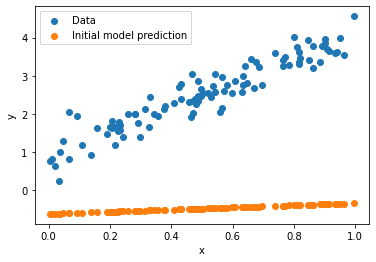

In [97]:
plt.scatter(x[:,0], y, label='Data')
plt.scatter(x[:,0],  y_pred_init.detach(), label='Initial model prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.legend();

<div class="alert alert-block alert-info">
Instead of updating the model parameters manually as we did before, a pytorch <b>optimizer</b> will update them for us. More advanced optimizers also keep track of gradient history to make parameter updates more efficient.
</div>

**without optimizer:**

```python
    loss.backward()
    with torch.no_grad():
        m.data -= lr * m.grad
        c.data -= lr * c.grad
        m.grad.zero_()
        c.grad.zero_()
```
**with optimizer:**

```python
    optimizer = optim.SGD(model.parameters(), lr=0.1)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
```


Initialize model and optimizer

In [98]:
model = nn.Linear(in_features=1, out_features=1, bias=True)
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [99]:
def fit():
    """This function performs one training step:
    
    1. Forward pass: pass data to model and calculate loss
    2. Backward pass: calculate derivatives
    3. Update parameters
    """
    y_hat = model(x)
    loss = mse(y_hat.view(-1), y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    if i % 100 == 0: 
        print(f'iteration: {i}, MSE: {loss.item():.4f}')

In [100]:
for i in range(1000): 
    fit()

iteration: 0, MSE: 5.9676
iteration: 100, MSE: 0.1388
iteration: 200, MSE: 0.0927
iteration: 300, MSE: 0.0882
iteration: 400, MSE: 0.0877
iteration: 500, MSE: 0.0877
iteration: 600, MSE: 0.0877
iteration: 700, MSE: 0.0877
iteration: 800, MSE: 0.0877
iteration: 900, MSE: 0.0877


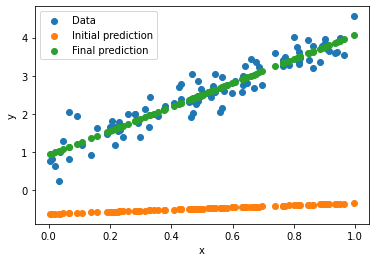

In [101]:
y_pred = model(x) #getting prediction

plt.scatter(x, y, label='Data')
plt.scatter(x, y_pred_init.detach(), label='Initial prediction')
plt.scatter(x, y_pred.detach(), label='Final prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.legend();

This is it for now:)